<div style="border:solid green 2px; padding: 20px">
<b>Hello, Boris!</b>

Grigoriy is here again, I've reviewed your previous project :)
Hi Grigoriy I know it very well this is the third project actually ;) 
    

You can find my comments in <font color='green'>green</font>, <font color='orange'>yellow</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>

### <font color='orange'>General feedback</font>
Thank you for sending your project.  It's clear that a lot of work has been put into it, your coding style is really good. Even though you have to correct some things in your project, but don't worry, you've got this  💪 

**Update**:<br>
Thank you for the update, your project has been accepted.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Additional links:
    <ul>
        <li>Barplot vs pie chart overview: <a>https://chartio.com/learn/charts/how-to-choose-pie-chart-vs-bar-chart/</a></li>
        <li>Pandas profilier: <a>https://github.com/pandas-profiling/pandas-profiling</a></li>
        <li>Top 50 matplotlib visualizations: <a>https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/</a></li>
    </ul>
</div>

---

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small tip: you can improve your work by adding a short introduction and research goals.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go 
import plotly.express as px

In [2]:
!pip install usaddress

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import usaddress

##### Download the data and prepare it for analysis

In [4]:
data = pd.read_csv('/datasets/rest_data_us.csv')
data.columns = data.columns.str.replace(' ', '_').str.lower()
display(data.head())
display(data.tail())
display(data.info())
display(data.describe())
print(data.isna().sum())
print(data.duplicated().sum()) # checking for duplicates
data = data.dropna()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64
0


In [5]:
def regex_str_col(data, columns):
    for column in columns:
        data[column] = data[column].str.lower() #lowercase all strings
        data[column] = data[column].str.split('#').str[0] #remove everything after the # symbol
        data[column] = data[column].replace('[^a-zA-Z0-9 ]', '', regex=True) #remove all none alphanumeric characters
        data[column] = data[column].replace('  ', ' ', regex=True) #convert two spaces into 2 space
    return data

columns = ['object_name', 'address', 'object_type']
rest = regex_str_col(data, columns)
dups = rest[rest.sort_values(by='id').duplicated(subset=['object_name','address'], keep='first')]
rest = rest[~rest['id'].isin(dups['id'])] # droping duplicates
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9605 entries, 0 to 9650
Data columns (total 6 columns):
id             9605 non-null int64
object_name    9605 non-null object
address        9605 non-null object
chain          9605 non-null object
object_type    9605 non-null object
number         9605 non-null int64
dtypes: int64(2), object(4)
memory usage: 525.3+ KB


<div class="alert alert-warning">
<b>Reviewer's comment:</b> Please, pay attnetion to how you drop duplicates from <code>subset=['object_name','address']</code>. There is a possibility for large shopping centers, where at the same address will be a few same-name establishments. 
</div>

After analyzing the data I got rid of 3 none type objects, then the regular duplicated() formula didn't help me to find duplicates cause the same data rows could appear under lower and upper cases and have different spaces or symbols, so in order to identify the duplicates I did some manipulation with data by creating special formula and after find out duplicate rows I just got rid of them. The data was ready for further analysis.

##### Data analysis

Investigate the proportions of the various types of establishments. Plot a graph.

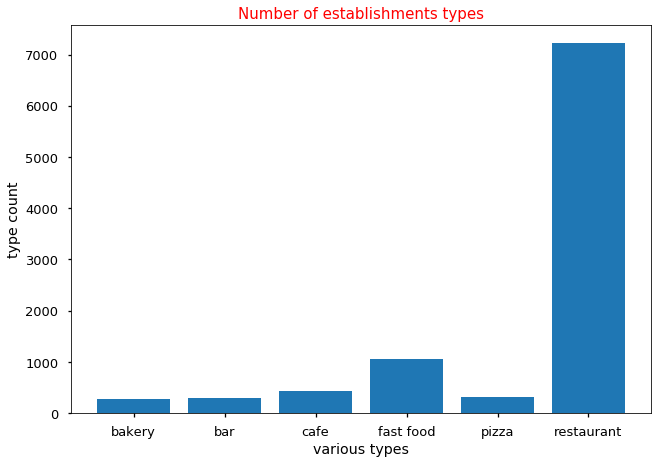

,establishments,type_count
0,bakery,283
1,bar,291
2,cafe,434
3,fast food,1058
4,pizza,314
5,restaurant,7225


In [6]:
estab = rest.groupby('object_type')['id'].count().reset_index()
estab = estab.rename(columns={'object_type': 'establishments', 'id': 'type_count'})
with plt.style.context('seaborn-talk'):
    plt.bar(estab['establishments'], estab['type_count'])
    plt.title('Number of establishments types', color = 'red', size = 15)
    plt.xlabel('various types')
    plt.ylabel('type count')
plt.show()
estab

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Well done! You can remove the table and annotate your barplot. Check this link:<a>https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html</a>
</div>

In [ ]:
name_rest = estab['establishments']
values = estab['type_count']
fig = go.Figure(data=[go.Pie(labels=name_rest, values=values)])
fig.update_layout(title_font_color='red', title_font_size=15,                
    title={    
        'text': ' Proportions of establishments types',
        'y':0.90,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top',     
          })
fig.show() 

As we can see the restaurant business takes the major part of all establishments, 75% of all samples are restaurants. 

Investigate the proportions of chain and nonchain establishments. Plot a graph.

In [ ]:
non_chain_estab =rest[rest['chain']==False]
chain_estab =rest[rest['chain']==True]
chain_estab = chain_estab.groupby(['chain','object_type'])['id'].count().reset_index()
non_chain_estab = non_chain_estab.groupby(['chain','object_type'])['id'].count().reset_index()
chain_estab = chain_estab.rename(columns={'object_type': 'establishments', 'id': 'type_count'})
non_chain_estab = non_chain_estab.rename(columns={'object_type': 'establishments', 'id': 'type_count'})
fig = go.Figure()
fig.add_trace(go.Bar(x=chain_estab['establishments'], y=chain_estab['type_count'],name='Chain'))
fig.add_trace(go.Bar(x=non_chain_estab['establishments'], y=non_chain_estab['type_count'],name='Not chain'))
fig.update_layout(title_font_color='red', title_font_size=15,                
    title={    
        'text': ' Chain proportion by establishments types',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',     
          })
fig.show()

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Sorry, but what's the idea behind this plot? You grab chain only establishments and plot their chain status.
</div>

You are absolutely right, so I just removed this plot.

Which type of establishment is typically a chain?

<div class="alert alert-warning">
<b>Reviewer's comment:</b> Please, use markdown suptitles for the tasks questions.
</div>

Relying on this data most of bakeries are a chain also fast food and cafes.

What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Please, pay attention, that in this case scatter plot (chain size / seats amount) would be more helpful. So, you need to group your data by chain names and find both values.
</div>

In [ ]:
fig = px.histogram(rest, x='number', title= 'Distribution of establishments by number of seats', color='chain')
fig.update_xaxes(title_text='Number of seats')
fig.update_yaxes(title_text='Number of establishments')
fig.show()

As we can see from the histogram there is much more chain establishments with a small number of seats but it doesn't characterizes chains cause the same picture we can see with non chain establishments. I think the number of seats more depends on space limits and rent costs and not if establishment is a chain or not.

Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [ ]:
chain_seats_avg = rest[rest['chain']==True]
chain_seats_avg = chain_seats_avg.groupby('object_type')['number'].mean().reset_index()
non_chain_seats_avg = rest[rest['chain']==False]
non_chain_seats_avg = non_chain_seats_avg.groupby('object_type')['number'].mean().reset_index()
tot_seats_avg = rest.groupby('object_type')['number'].mean().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=chain_seats_avg['object_type'], y=chain_seats_avg['number'],name='Chain'))
fig.add_trace(go.Bar(x=non_chain_seats_avg['object_type'], y=non_chain_seats_avg['number'],name='Not chain'))
fig.add_trace(go.Bar(x=tot_seats_avg['object_type'], y=tot_seats_avg['number'],name='Total'))
fig.update_layout(title_font_color='red', title_font_size=15,                
    title={    
        'text': 'Average number of seats',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',     
          })
fig.update_yaxes(title_text='Number of seats')
fig.show()

As we see from graph, restaurants wich are not a chain have the greatest average number of seats, on the other side establishments that we found out are typically a chain first cafes and then fast food have on average more of a seats than same types of establishments that are not a chain. Any way the average number of seats stays under the 50.

<div class="alert alert-success">
<b>Reviewer's comment:</b> 👍
</div>

Put the data on street names from the address column in a separate column

In [ ]:
street_example=data.iloc[0]['address']
street_example

In [ ]:
usaddress.parse(street_example)

In [ ]:
raw_address=usaddress.parse(street_example)
raw_address

In [ ]:
#create a new dictionary. Iterate over a list with components. So we just say: For each component in raw_address
#save component's name as key (i[1]) and component itself as value of the dictionary (i[0])
dict_address={}
for i in raw_address:
    dict_address.update({i[1]:i[0]})

In [ ]:
dict_address['StreetName']+','+dict_address['AddressNumber']

In [ ]:
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

In [ ]:
data['clean_street_check']=data.address.apply(cleaning_check)
data[data['clean_street_check']=='no street or number']

In [ ]:
usaddress.parse(data.iloc[1888]['address'])

In [ ]:
def cleaning_final(raw):
    if raw.startswith('olvera'):
        clean_adress='olvera,Los Angeles,USA'
    elif raw.startswith('300 s santa fe'):
        clean_adress='300 s santa fe,Los Angeles,USA'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=str(dict_address['StreetName'])
    return clean_adress

In [ ]:
data['street_name']=data.address.apply(cleaning_final)
data.sample(10)

In [ ]:
rest = rest.merge(data[['id','street_name']],how='inner', on='id')

In [ ]:
rest.sample(10)

Plot a graph of the top ten streets by number of restaurants

In [ ]:
count_rest = rest[rest['object_type']=='restaurant']
count_rest = count_rest.groupby('street_name')['object_type'].count().reset_index()
top_ten_rest = count_rest.sort_values(by='object_type', ascending=False).head(10)
top_ten_rest = top_ten_rest.rename(columns={'object_type': 'restaurants_count'})

In [ ]:
fig = px.bar(top_ten_rest, x='street_name',  y='restaurants_count')
fig.update_layout(title_font_color='red', title_font_size=15, xaxis_tickangle=-45,                
    title={    
        'text': 'Top Ten Restaurants',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',     
          })
fig.show()

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Good! You can improve your visualization by switching from the vertical barplot to the horizontal one. What do this streets have in common?
</div>

Find the number of streets that only have one restaurant.

In [ ]:
count_rest = count_rest.rename(columns={'object_type': 'restaurants_count'})
only_one = count_rest[count_rest['restaurants_count']==1].count()
only_one

The number of streets that have only one restaurant: 4062

For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [ ]:
trends = rest[rest['street_name'].isin(top_ten_rest['street_name'])]
trends = trends.groupby('street_name')['number'].median().round().reset_index()
trends = trends.rename(columns={'number': 'median_seats_number'})
trends = trends.sort_values(by='median_seats_number', ascending=False)

In [ ]:
fig = px.bar(trends, x='street_name',  y='median_seats_number')
fig.update_layout(title_font_color='red', title_font_size=15, xaxis_tickangle=-45,                
    title={    
        'text': 'Top Ten Restaurants',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',     
          })
fig.show()

In [ ]:
corr = top_ten_rest.merge(trends, how='inner', on='street_name')

In [ ]:
grid =sns.jointplot(x='median_seats_number', y='restaurants_count',height=7, ratio=2, space=0.2, data=corr, kind='reg')
grid.fig.suptitle('linear correlation')
plt.show()


<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, add a title to this jointplot.
</div>

The graph shows we've got a positive linear correlation, I used the median number of seats in order to avoid the outliers affect and as we see for streets with a lot of restaurants as more the streets have restaurants there is higher potential of more restaurant's seats.

##### Overall conclusion

After investigating the proportions of establishments types we found out that restaurants are the most popular business, all the bakeries of the sample were chains and high proportions of fast food and cafes, I can't characterize chains by the number of their seats because establishments types that are not chains have same distribution of seats. Also we identified the top ten streets with the most number of restaurants and found out that there is positive linear correlation between the number of restaurants on streets with a lot of restaurants and the number of restaurant's seats. Bon appetite. Based on this findings I suggest to establish robocafe as a new brand with potential to became a chain, in order to serve as many clients as possible I suggest to open the cafe on one of ten top restaurant streets. Good Luck!

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Nice observations! Please, provide more detailed recommendations for robo-cafe.
</div>

##### Link of presentation of my research: <a href="https://drive.google.com/file/d/1eXcvoeouU-0F3eM_fI-etNFw6ZWzbfen/view?usp=sharing">Project presentation</a>

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Well done, this document could be a great draft for a future presentation. Please, make a presentation based on it - with slides and other inherent attributes. You can ask your tutor about presentation templates if you need help.
</div>


Grigoriy I have been asked to: Make a presentation of your research to share with investors. You can use any tool you’d like to create it, but you must convert your presentation to PDF format for assessment. Include a link to the presentation, and that exactly what I did I really don't know  what slides you are talking about any way that part wasn't in this course, thank you for all advices and links that you provided I will definitely use them in future but for now I am done.

<div class="alert alert-warning">
<b>Reviewer's comment v2:</b> Okay, I don't see the point in forcing students to study. The question is that the analytics market is very competitive, so this way you give your competitors a chance.
</div>